## Convolução 1D

Antes de entrarmos no domínio das imagens, vamos entender a convolução em um contexto mais simples, trabalhando com sinais de apenas 1 dimensão.

Lembrando: A convolução é o somatório do produto entre funções, sendo uma delas **invertida e deslocada**. A Convolução **1D** indica que esta função será deslocada em apenas uma dimensão.
  
---

Vamos assumir o seguinte problema:<br>
Você decidiu coletar dados do acelerômetro de um celular. O objetivo é fazer com que pessoas caminhem com o celular no bolso para analisar como o sensor responde a esse movimento. Como demonstrado [nesse trabalho](https://www.researchgate.net/publication/221296054_Impact_of_different_walking_surfaces_on_gait_identification_based_on_higher-order_statistics_of_accelerometer_data/figures?lo=1), a magnitude no sinal do acelerômetro se altera como uma espécie de **senóide ruidosa**.


A seguir vamos simular um dado semelhante e supor que **queremos localizar os intervalos crescentes nesse sinal.**

In [2]:
%pip install scipy

     --------------------------------------- 42.5/42.5 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


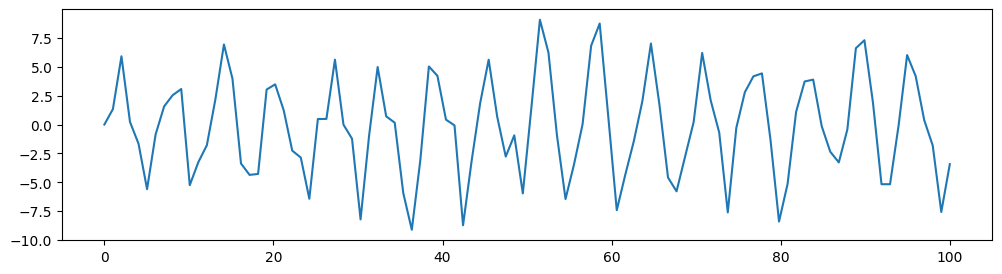

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

x = np.linspace(0, 100, 100)
sin = 10 * np.sin(x) * np.random.rand(x.shape[0])

plt.figure(figsize=(12, 3))
plt.plot(x, sin)

Pra facilitar, a célula a seguir apresenta uma função que usa o matplotlib para imprimir os sinais 1D como um vetor de valores.

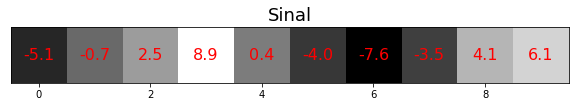

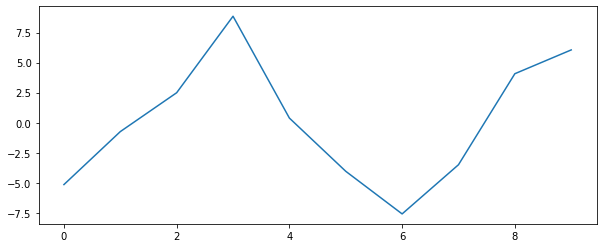

In [ ]:
def show(valores, title,):
  plt.figure(figsize=(len(valores), 2))
  plt.imshow(valores[np.newaxis, :], cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
  plt.title(title, fontsize=18)
  plt.yticks([])

### Representação 1D

Utilizaremos um pequeno trecho do sinal para ilustrar o efeito da convolução.

In [ ]:
sinal = sin[5:15]
show(sinal, 'Sinal')

plt.figure(figsize=(10, 4))
plt.plot(sinal)

### Kernel

No contexto de processamento de imagens, o kernel é um **filtro convolucional**. De forma prática, é uma matriz n-dimensional que será operada com o dado através de uma convolução.

Pode-se dizer que a convolução **mede a semelhança** entre os dois sinais.

Precisamos portanto propor um kernel que simule o padrão procurado: intervalos crescentes. 
> Mas lembre-se que a convolução opera as funções após **inverter o kernel**.

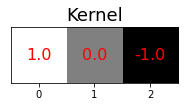

In [ ]:
kernel = np.asarray([1,0,-1])
show(kernel, 'Kernel')

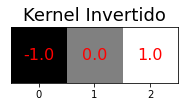

In [ ]:
kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

Na célula a seguir vamos imprimir o kernel **deslocando-o ao longo do sinal** para entender passo a passo da operação.

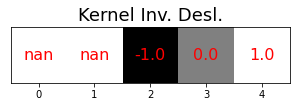

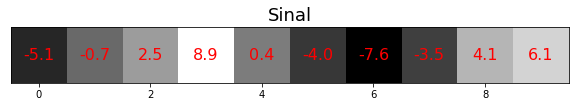

In [ ]:
plt.close('all')

## Vamos alterar o valor de u 
## para deslocar o kernel
u=2
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel Inv. Desl.')
show(sinal, 'Sinal')

Agora vamos comparar os nossos cálculos com o resultado da função ```convolve``` da biblioteca ```scipy```

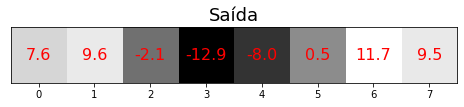

In [ ]:
out = convolve(sinal, kernel, mode='valid')
show(out, 'Saída')

Pra ficar mais visual, vamos imprimir a função resultante sobreposta ao sinal original, de modo a entender melhor como essa função nos ajuda a identificar os intervalos crescentes do sinal original.

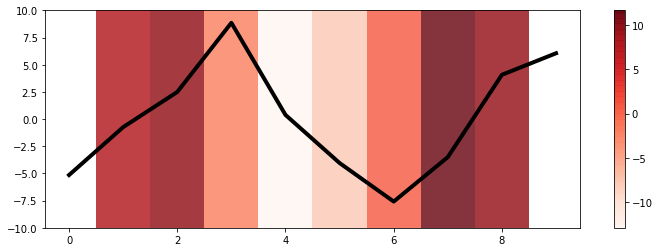

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))
plt.colorbar()

E se rodarmos no restante do sinal como uma espécie de classificação?<br>
Neste contexto específico, podemos considerar que **ativações menores que zero** indicam que não há tendência crescente naquele intervalo do sinal.

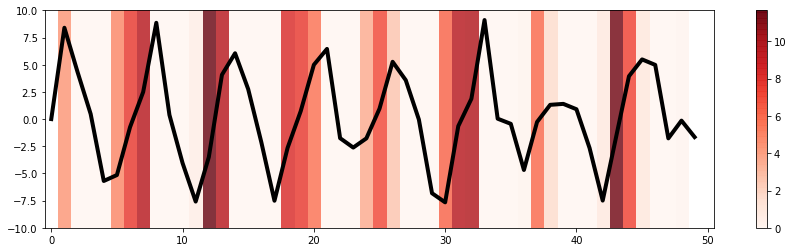

In [ ]:
out = convolve(sin[:50], kernel, mode='valid')
out[out < 0] = 0

plt.figure(figsize=(15, 4))
plt.plot(sin[:50], color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()